<a href="https://colab.research.google.com/github/ShounakDas101/multibody/blob/main/flip_mind_ODE_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model of mind to be implemented in a Robot

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

I = moment of inertia, a = depth of ptential well, w = angular velocity of oscillationg mind, f = is a fraction to modify the potential well, b = damping factor, c = environmental force

for N=8, 5 options are generated in the potential well

k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelvin

T= Social Temperature    # actual value 300K (at room temp)

Therefore, kT=1.38x3=4.14

KE=0.5*I*w2 kinetic energy

U = internal energy

In [3]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=3.5
c=2.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
Amp=math.sqrt(a)

Energy loss due to frictional force:

if b= damping factor, then average energy loss = 1/2 x b x omega_square

Energy gain/loss due to external force, c:

c x cos (theta_max - theta)

Asssuming angular velocity is not varying much

In [27]:
# Mind Potential Equation biased because of  various brands in the market
omega_square=I/a
t = np.arange(-np.pi/2,np.pi/2,0.05)   # start,stop,step
t_max=np.pi/2
H0 = U + a*(1-np.cos(t))
H1 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t))
H2 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t)) - 0.5*b*omega_square
H3 = U + a*(1-np.cos(t)) + f*a*(1-np.cos(t)*np.cos(N*t)) - 0.5*b*omega_square + c*np.cos(t)

#In the figure
frictional force is dissipative in nature, it reduces the free energy level

external force will add energy to the system, it boosts free energy level for +ve force reduced flipping probability or vice-versa

We are using -ve energy, for demonstration

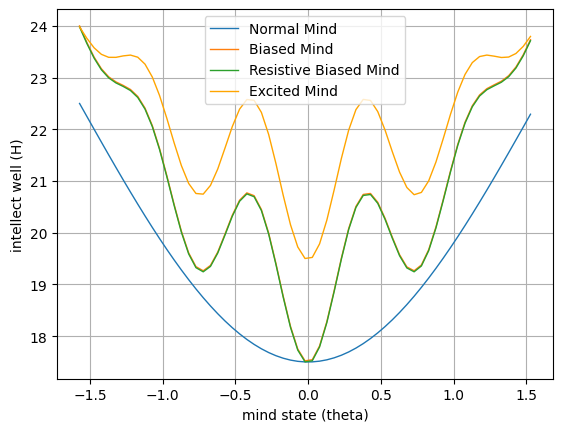

In [28]:
# A plot of the fluid height (position) inside the straw as a function of time.
#plt.plot(t,y)
# plt.show()
plt.plot(t, H0, t, H1, t, H2, t, H3, 'orange', linewidth = 1)
plt.xlabel('mind state (theta)')
plt.ylabel('intellect well (H)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend(['Normal Mind', 'Biased Mind', 'Resistive Biased Mind', 'Excited Mind'])
plt.grid(True)

# Fig. 1
*Mental Energy as a function of displacement angle. Mind is oscillating inside a brand well, it may flip to other brand by gaining knowledge from information. Blue curve represents the potential well of a healthy unbiased mind. Orange line represents the potential well of a biased mind due to various brands in the market.*

---



Reduce b so that system ocsillates properly, top we have used b=3.5 just to show the graphs properly.

# Ideal Test Energy Output

In [29]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=0.2
c=2.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
Amp=0.5*np.pi - 0.0001
print("angular displacement should not be > pi/2() :",Amp)

angular displacement should not be > pi/2() : 1.5706963267948966


In [30]:
def test_osc(x,t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0]
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi
    return [x[1], -a*x[0] -b*x[1]]

In [71]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 1700

# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
theta =Amp
omega =0
init_value =[theta, omega] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    Hi= 0.5*1*omega*omega + 0.5*a*theta*theta - 0.5*b*omega*omega # 0.5*I*omega^2 + 0.5*k*theta^2 -0.5*b*omega^2
    enrg_array[i]=Hi
    # Calculate the average of the last 5 elements
    # last_five_average = np.mean(enrg_array[-5:])
    solution = odeint(test_osc, init_value, my_time)
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    # Now calculate the free energy Hi
    theta=posi_array[i]
    omega=velo_array[i]
    init_value = [theta, omega]

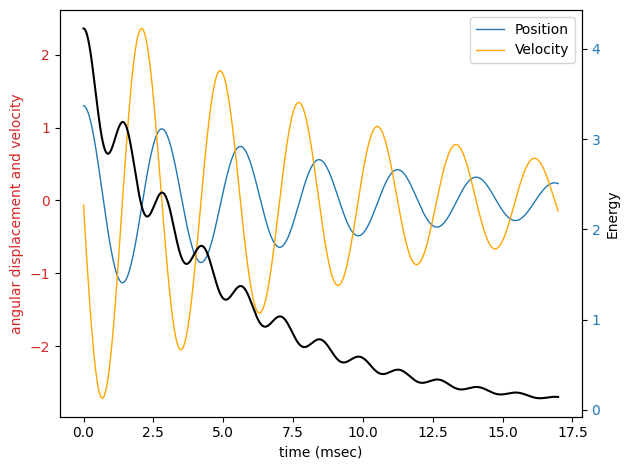

In [91]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, velo_array,  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Fig 2
Harmonic oscillator with damping. The energy decays with time.

# Coupled Oscillator OUTPUT

In [32]:
def coupled_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0]
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi

    return  [x[1], -a*np.sin(x[0]) -b*x[1] -f*a*np.sin(x[0])*np.cos(N*x[0]) - f*a*np.cos(x[0])*np.sin(N*x[0])]

In [53]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.1  # it should be a fraction
b=0.2
c=2.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
Amp=0.5*np.pi - 0.2
print("angular displacement should not be > pi/2() :",Amp)

angular displacement should not be > pi/2() : 1.3707963267948966


In [101]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 1000
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)
velo_array = np.zeros(no_of_samples)
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[Amp,0] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    enrg_array[i]= 15 + 0.5*I*omega*omega + a*(1-np.cos(theta)) +  f*a*(1-np.cos(theta)*np.cos(N*theta)) - 0.5*b*omega*omega
    solution = odeint(coupled_osc, init_value, my_time)
    #init_value =solution[1,0],solution[1,1]
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    theta=posi_array[i]
    omega=velo_array[i]
    init_value = [theta, omega]
    #print (i*my_time[1], solution[1,0], solution[1,1])

#print(posi_array)
# A plot of the fluid height (position) inside the straw as a function of time.
# plt.plot(time_array, posi_array,time_array, velo_array,time_array, enrg_array, 'red', linewidth = 1)
# plt.xlabel('time (s)')
# plt.ylabel('position (cm)')
# plt.legend(['angular displacement', 'angular velocity', 'Energy'])
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.grid(True)

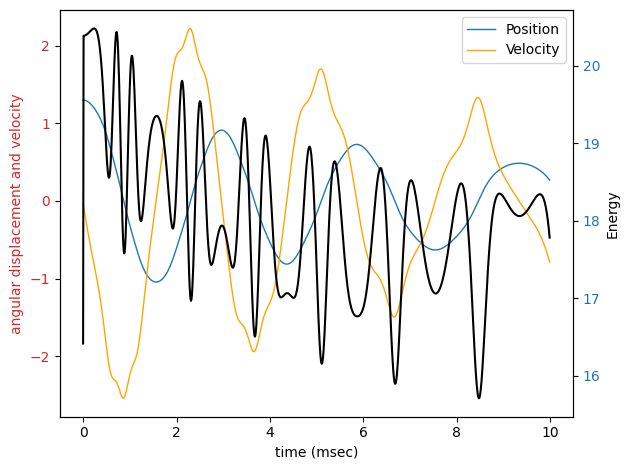

In [102]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, velo_array,  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Fig 3

# Flip Oscillator OUTPUT

In [36]:
def flip_osc(x, t):
    if   x[0] > 0.5*np.pi:
        x[0]=0.5*np.pi - x[0]
    elif x[0]< -0.5*np.pi:
        x[0]=x[0] - 0.5*np.pi
    return  [x[1], -a*np.sin(x[0]) -b*x[1]  -f*a*np.sin(x[0])*np.cos(N*x[0]) - f*a*np.cos(x[0])*np.sin(N*x[0]) + c*np.sin(x[0])]

In [37]:
I=1.0
a=5.0
w2=a/I # it is actually square of angular frequency
f=0.3  # it should be a fraction
b=0.2
c=3.0

N=8
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15
Amp=0.5*np.pi - 0.0001
print("angular displacement should not be > pi/2() :",Amp)

angular displacement should not be > pi/2() : 1.5706963267948966


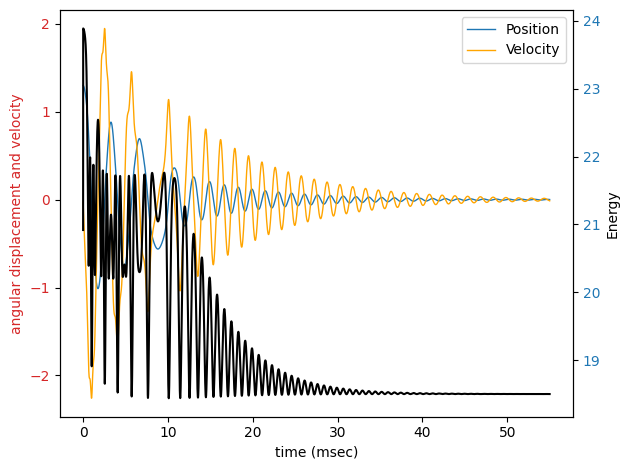

In [95]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 5500
# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)
velo_array = np.zeros(no_of_samples)
enrg_array = np.zeros(no_of_samples)  # energy
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
init_value =[Amp,0] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    my_time = [0,1e-2]
    enrg_array[i]= U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(theta)*np.cos(N*theta))- 0.5*b*omega*omega + c*np.cos(omega)
    solution = odeint(flip_osc, init_value, my_time)
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    theta=posi_array[i]
    omega=velo_array[i]
    init_value =theta, omega
    #print (i*my_time[1], solution[1,0], solution[1,1])

from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, velo_array,  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Fig 4

# Final Model Simulation

In [97]:
I=1.0
a=5.0
b=0.2
c=1.0
f=0.3  # it should be a fraction
w2=a/I # it is actually square of angular frequency



N=8 # No of anaisotropy in the potential well = 1+N/2
k=1.38 # boltzmann constant, actual value is 1.380649E-23 Joules/Kelin
T=3    # actual value 300K (at room temp)
KE=0.5*I*w2
U = 15+KE
Amp = 1.3

In [98]:
# Next, we create an array of the desired times for the solution.
no_of_samples = 15000

# Create an empty NumPy array of zeros
time_array = np.zeros(no_of_samples)
posi_array = np.zeros(no_of_samples)  # displacement or position
velo_array = np.zeros(no_of_samples)  # velocity
enrg_array = np.zeros(no_of_samples)  # energy
mean_array = np.zeros(no_of_samples)
my_time = [0,1e-2] # odeint takes time in terms of array only, h=t1-t0
theta = Amp #np.pi/2
omega =0
init_value =[theta, omega] # odeint takes init_value in terms of array only
for i in range(0,no_of_samples,1):
    #my_time = [0,1e-2]
    #enrg_array[i]=Hi
    # Calculate the average of the last 50 elements
    if i<150:
        mean_array[i] = enrg_array[i]
    else :
        mean_array[i] = np.mean(enrg_array[i-150:i])
    if  0<mean_array[i]<18.0:
            enrg_array[i]= U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(theta)*np.cos(N*theta))- b*omega*omega + c*np.cos(theta)
            #theta =np.pi/2
            omega =  math.sqrt(2*c*np.cos(theta)/I + omega*omega) # energy injected to the system is converted to KE in the system
            init_value =[theta, omega]
            solution = odeint(flip_osc, init_value, my_time)
    else:
            enrg_array[i]= U + 0.5*I*omega*omega + a*(1-np.cos(theta))+ f*a*(1-np.cos(theta)*np.cos(N*theta))- b*omega*omega
            solution = odeint(coupled_osc, init_value, my_time)
    #init_value =solution[1,0],solution[1,1]
    time_array[i]=i*1e-2
    posi_array[i]=solution[1,0]
    velo_array[i]=solution[1,1]
    # Now calculate the free energy Hi
    theta=posi_array[i]
    omega=velo_array[i]
    init_value=[theta, omega]
    #print (last_five_average,theta,omega)



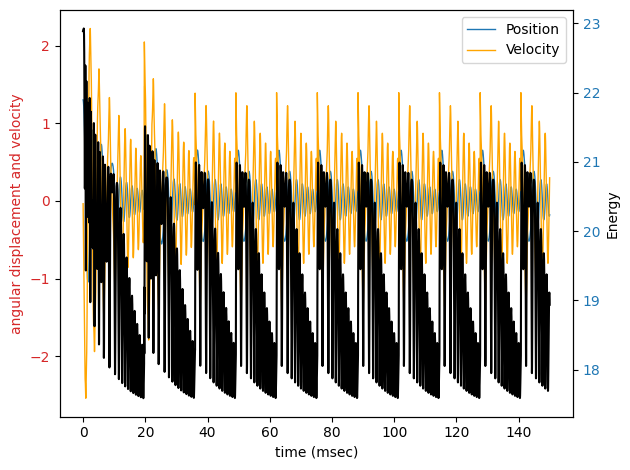

In [99]:
from matplotlib import colors
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (msec)')
ax1.set_ylabel('angular displacement and velocity', color=color)
ax1.plot(time_array, posi_array, time_array, velo_array,  'orange', linewidth = 1)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Position', 'Velocity'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy', color='black')  # we already handled the x-label with ax1
ax2.plot(time_array, enrg_array, color='black')
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend(['Energy'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Fig. 5

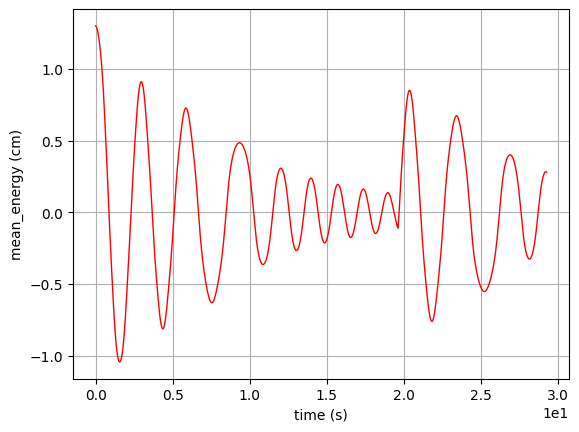

In [100]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array[0:2925], posi_array[0:2925],'red', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('mean_energy (cm)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

# Fig. 6

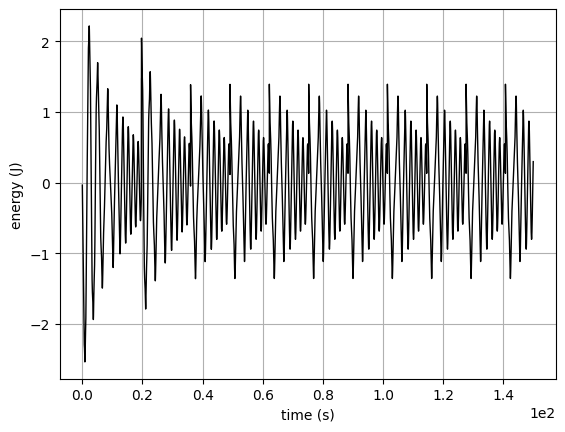

In [62]:
# A plot of the fluid height (position) inside the straw as a function of time.
plt.plot(time_array, velo_array, 'black', linewidth = 1)
plt.xlabel('time (s)')
plt.ylabel('energy (J)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.grid(True)

# Fig. 7